# ATO - Analytics

### Import Library

In [44]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [45]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [46]:
data = dataset.copy()

In [47]:
# data = data[data.index > '2020-11-01 00:00:00']

In [48]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2025-11-04 14:10:00,1890.7,1891.0,1885.5,1887.3,5379
2025-11-04 14:15:00,1887.2,1899.0,1887.2,1898.5,13871
2025-11-04 14:20:00,1898.2,1907.7,1897.0,1904.2,16090


In [49]:
daily_data = data.resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

In [50]:
## Phân phối ATO có ở trong vùng Long-Short

In [51]:
daily_data["stoploss"] = daily_data.apply(lambda r: max(r["Open"] * 0.322 / 100, 3), axis=1)

In [52]:
daily_data["LS_able_900"] = daily_data.apply(lambda r: False if (r["High"] > r["Open"] + r["stoploss"] and r["Low"] < r["Open"] - r["stoploss"]) else True , axis=1)
daily_data["Deal"] = daily_data.apply(lambda r: None if r["LS_able_900"] == False else ("Short" if r["Low"] < r["Open"] - r["stoploss"] else "Long"), axis=1)

In [53]:
daily_data

,Volume,Open,Close,High,Low,stoploss,LS_able_900,Deal
Date,,,,,,,,
2018-08-13,79327,943.5,954.2,954.6,942.3,3.038070,True,Long
2018-08-14,79266,955.5,959.3,961.8,952.1,3.076710,False,None
2018-08-15,89449,958.0,946.6,962.3,946.6,3.084760,False,None
2018-08-16,71410,942.4,947.0,947.3,935.5,3.034528,False,None
2018-08-17,98531,952.2,947.0,954.6,945.0,3.066084,True,Short
...,...,...,...,...,...,...,...,...
2025-10-29,273188,1943.8,1947.0,1964.7,1936.1,6.259036,False,None
2025-10-30,331492,1947.0,1927.0,1948.4,1910.5,6.269340,True,Short
2025-10-31,341853,1928.0,1892.0,1928.0,1887.5,6.208160,True,Short


Text(0.5, 1.0, "Tỷ lệ True / False của cột 'LS_able_900'")

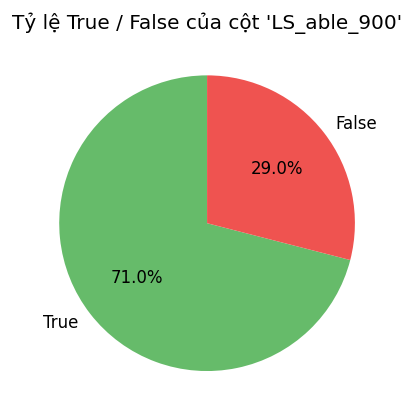

In [54]:
# Đếm số lượng True / False
counts = daily_data['LS_able_900'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66bb6a', '#ef5350']
)
plt.title("Tỷ lệ True / False của cột 'LS_able_900'")

## Sự phân bổ deal (Long/Short/None)

Text(0.5, 1.0, 'Tỷ lệ tín hiệu: None / Long / Short')

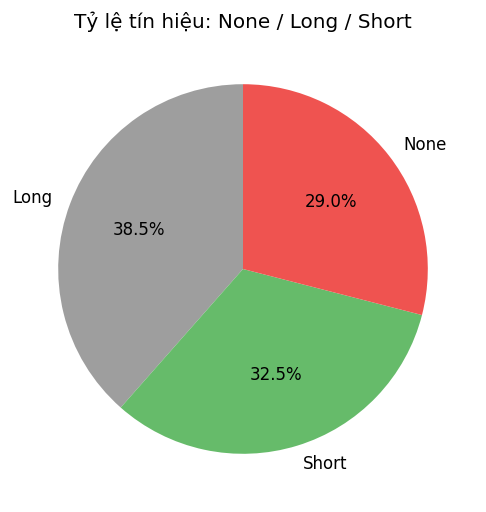

In [58]:
# Giả sử cột bạn muốn vẽ là 'signal'
counts2 = daily_data['Deal'].value_counts(dropna=False)

# Đổi tên NaN hoặc None cho dễ đọc
counts2.index = counts2.index.astype(str)

# Vẽ pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    counts2,
    labels=counts2.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#9e9e9e', '#66bb6a', '#ef5350']  # xám, xanh, đỏ
)
plt.title("Tỷ lệ tín hiệu: None / Long / Short")